In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

**Decision Tree Nodes :**   
Within the context of a node, one can test for something.   
Example : Is_Cryosleep, y / n. Yes point to 'less_than_2_year', 'more_than_2_years', etc.

In [2]:
st = pd.read_csv('space_titanic.csv')

st.head()

# DataFrame for Space Titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
st.columns

# annoying bc all uppercase

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [4]:
st.columns = [column.lower() for column in st.columns]

# lowercasing the column names

In [5]:
st.info()

# there are some null values

# 'transported' is target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# dropping null values for efficiency, bc this lesson is not about imputation but about decision trees
st.dropna()

# NaNs not truly gone from DF, because it's not been reassigned to a variable.

# Reassigning to variable in order to preserved dropped NaNs
st = st.dropna()
st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   6606 non-null   object 
 1   homeplanet    6606 non-null   object 
 2   cryosleep     6606 non-null   object 
 3   cabin         6606 non-null   object 
 4   destination   6606 non-null   object 
 5   age           6606 non-null   float64
 6   vip           6606 non-null   object 
 7   roomservice   6606 non-null   float64
 8   foodcourt     6606 non-null   float64
 9   shoppingmall  6606 non-null   float64
 10  spa           6606 non-null   float64
 11  vrdeck        6606 non-null   float64
 12  name          6606 non-null   object 
 13  transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [7]:
# which columns to drop ?

st['cabin'].value_counts()   ## has 5305 unique values

G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: cabin, Length: 5305, dtype: int64

In [8]:
cols_to_drop = ['cabin', 'name', 'passengerid']

# dropping 'name' bc it doesn't help us to preserve survival outcome

In [9]:
st.drop(columns = cols_to_drop, inplace = True)
st

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [10]:
# creating dummies in order to help machine learning

st_dumm = pd.get_dummies(st[['homeplanet', 'destination']], drop_first = True)

st_dumm

,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,1,0,0,1
1,0,0,0,1
2,1,0,0,1
3,1,0,0,1
4,0,0,0,1
...,...,...,...,...
8688,1,0,0,0
8689,0,0,1,0
8690,0,0,0,1
8691,1,0,0,0


In [11]:
# now that we have the DF and the dummies, use concatenation to join the two :

pd.concat([st, st_dumm], axis = 1)

# axis = 1 in order to add more columns (axis = 0 adds more rows)

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,0,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,0


In [12]:
# assigning it to permanence

stcon = pd.concat([st, st_dumm], axis = 1)
stcon.head()

# dropping columns for machine learning purposes (don't do this for exploration purposes)

stcon.drop(columns = ['homeplanet', 'destination'], inplace = True)

stcon.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [13]:
stcon['transported'] = np.where(stcon['transported'] == True, 'True', 'False')

# making 'transported' into Boolean : where 'True', write 'True', else, write 'False'

In [14]:
stcon.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [15]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test


# general train - validate - test function 

In [16]:
train_val_test(stcon, 'transported')

# this above functions, but is technically incorrect, because we need 3 elements, whereas we returned 0 elements. Do this, instead :

train, val, test = train_val_test(stcon, 'transported')

train.shape, val.shape, test.shape

# but we're not yet ready to model the data, because... we should not include our target in the training data set.
# we're seeking to predict, which does not include using the pre-provided data (ie, answers).
# follows below...

((4624, 13), (991, 13), (991, 13))

In [17]:
## split train, val, test into X_train, X_val, X_test (feature DF, exludes var 'transported') and y-train, etc


X_train = train.drop(columns = ['transported'])
y_train = train['transported']


X_val = val.drop(columns = ['transported'])
y_val = val['transported']


X_test = test.drop(columns = ['transported'])
y_test = test['transported']

In [18]:
seed = 42

clf = DecisionTreeClassifier(max_depth = 3, random_state = seed)

# classifier = clf

# this is initialising the DecisionTreeClassifier object, an instance of the model, within the notebook, having
# the variable name 'clf', but we havne't done anything with it yet...

In [19]:
clf.fit(X_train, y_train)

# fitting the model : 
    # it must know the features and the labels, in order to associate them with one another.
    
# with this step, the model has been trained.

DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
clf.score(X_train, y_train)

# 'clf.score' tells us how accurate our model is. 
# Makes predictions on the X_train set against the y_train reality.
# the X_train data is compared against y_train : 75.7pc accuracy

0.7571366782006921

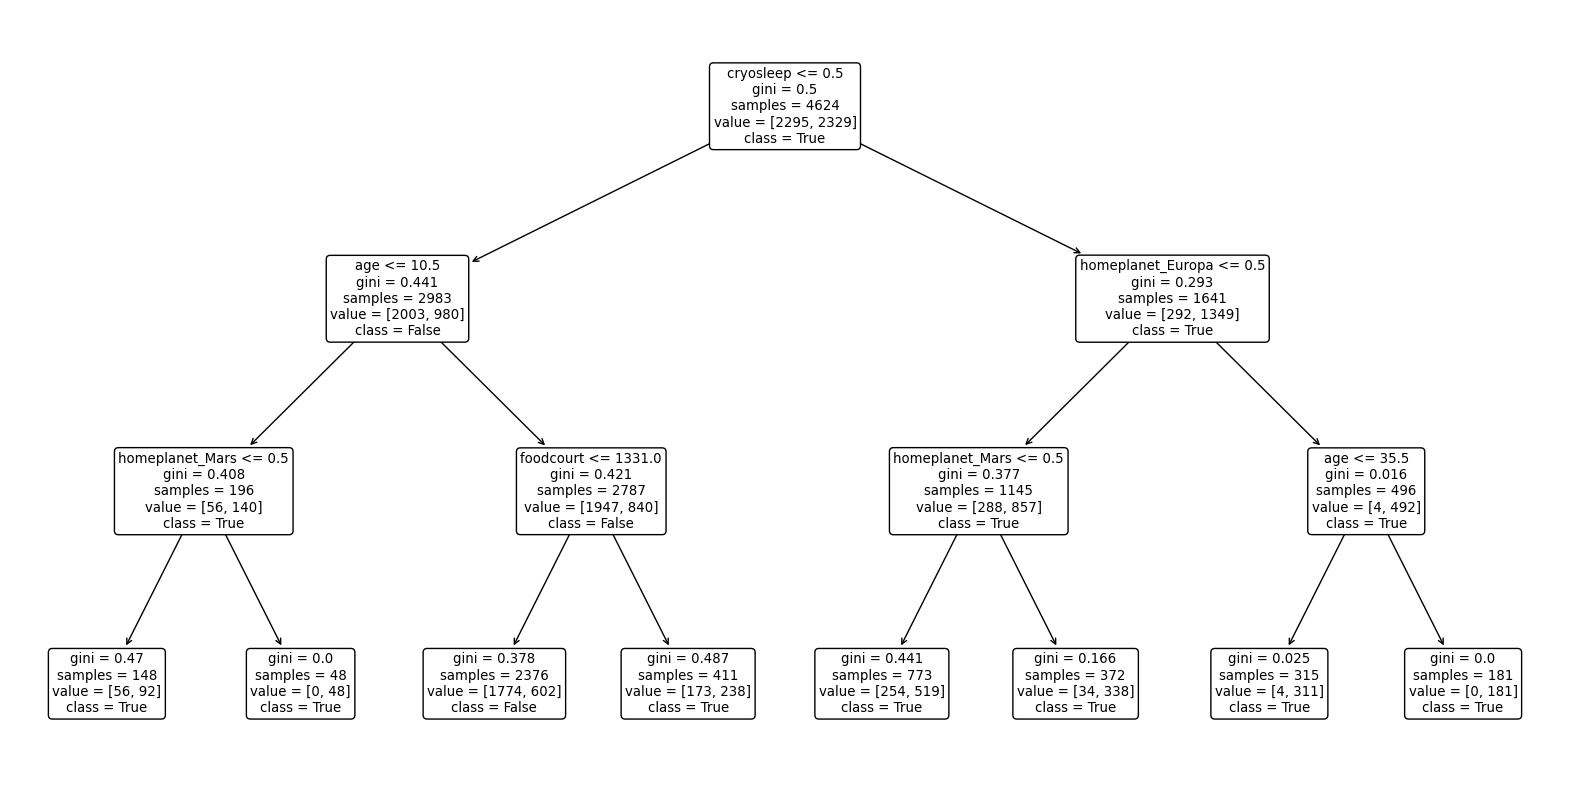

In [21]:
plt.figure(figsize = (20, 10))

plot_tree(clf, feature_names = X_train.columns, class_names = clf.classes_, rounded = True)

plt.show()

# feature names, names of possible outcomes
# 'classes_' used for attributes, called after an object in order to access specific info stored in that obj.

# max depth of 3 = three layers of decisions / splits being made in data

In [22]:
val_predictions = clf.predict(X_val)

# predictions are on the X_val ; true values are on y_val

In [23]:
## print the classification report :

print(classification_report(y_val, val_predictions))

# it would appear that the recall model is most suited, at 77pc.

              precision    recall  f1-score   support

       False       0.72      0.77      0.74       492
        True       0.76      0.71      0.73       499

    accuracy                           0.74       991
   macro avg       0.74      0.74      0.74       991
weighted avg       0.74      0.74      0.74       991



<h1 style="background-color:Tomato;"> Random Forests Lesson  </h1>

**Ensemble :**  
The random forest is made up of many models. There can be many types of ensembles. A model that is an amagamation of many models (decision tree classifiers), combining many models to make predictions.  

**Bootstrapping :**  
For any given tree in my model, I want it to be focussed on / trained on a given pc of all observations. This takes a random sample of the entire train dataset and then uses different random samples to train all the trees in the forest. This helps to prevent overfitting.  
Random sampling of the training dataset and using different samples to train each tree.  

**Aggregation :**   
After all the prediction-trees have been made, aggregate the trees. Use this to help determine outcomes. If there are enough trees, and each one's just-ok results are aggregated, the one final prediction should be quite acceptable.  

**Bagging :**  
Bootstrapping + Aggregation. Aggregating of the predictions of all the random predictions. 

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(max_depth = 3, random_state = 23,
                           max_samples = 0.5)        
                            # 50pc of all observations will be placed into each random sample



# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [26]:
rf.fit(X_train, y_train)

# training the random forest on the data

RandomForestClassifier(max_depth=3, max_samples=0.5, random_state=23)

In [27]:
rf.score(X_train, y_train)

# scoring the accuracy of the training set

0.7493512110726643

In [28]:
rf.score(X_val, y_val)

# scoring the accuracy of the validation dataset

0.7346115035317861

In [29]:
rf.feature_importances_

# model is ranking in feature importance according to how helpful it is in making predictions

array([0.26909198, 0.01731518, 0.00058242, 0.15949644, 0.08786412,
       0.06854607, 0.19282873, 0.14086554, 0.04665605, 0.00524037,
       0.00213992, 0.00937318])

In [30]:
X_train.columns

Index(['cryosleep', 'age', 'vip', 'roomservice', 'foodcourt', 'shoppingmall',
       'spa', 'vrdeck', 'homeplanet_Europa', 'homeplanet_Mars',
       'destination_PSO J318.5-22', 'destination_TRAPPIST-1e'],
      dtype='object')

In [31]:
importance_df = pd.DataFrame({'feature': X_train.columns.tolist(),  # naming X_train features, sent to a list
                             'importance': rf.feature_importances_}) 
                                  # matching the order of features in X_train to the importance

In [32]:
importance_df.sort_values('importance', ascending = False)

,feature,importance
0,cryosleep,0.269092
6,spa,0.192829
3,roomservice,0.159496
7,vrdeck,0.140866
4,foodcourt,0.087864
5,shoppingmall,0.068546
8,homeplanet_Europa,0.046656
1,age,0.017315
11,destination_TRAPPIST-1e,0.009373
9,homeplanet_Mars,0.005240


In [33]:
X_train['vip'].value_counts()

# maybe bc the VIP count is so low that it has little impact on survival

False    4526
True       98
Name: vip, dtype: int64

### Another Model

In [34]:
rf.score(X_val, y_val)

0.7346115035317861

In [35]:
rf2 = RandomForestClassifier(n_estimators = 200, max_depth = 5, 
                             random_state = 23, max_samples = 0.33)

# increasing number of estimators & max depth. Reducing max samples percentage

In [36]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_samples=0.33, n_estimators=200,
                       random_state=23)

In [37]:
rf2.score(X_train, y_train)

0.7943339100346021

In [38]:
rf2.score(X_val, y_val)

# the gap hasn'r really widended btwn rf.fit(X_train) and rf.score(X_val), 
  # and rf2.score(X_train) and rf2.score(X_val), 
  # but rf2 has a higher accuracy rate 

0.7699293642785066

In [39]:
rf2_train_preds = rf2.predict(X_train)
rf2_train_preds 

array(['True', 'False', 'True', ..., 'True', 'False', 'False'],
      dtype=object)

In [40]:
print(classification_report(y_train, rf2_train_preds))

# classification report on the training dataset

              precision    recall  f1-score   support

       False       0.78      0.81      0.80      2295
        True       0.81      0.78      0.79      2329

    accuracy                           0.79      4624
   macro avg       0.79      0.79      0.79      4624
weighted avg       0.79      0.79      0.79      4624



In [41]:
seed = 23

In [42]:
## BUILD A LOOP
# default step is 1 for i in range

for i in range(3, 11):
    
    rf = RandomForestClassifier(max_depth = i, random_state = seed,
                               max_samples = 0.5)      # each iteration of the loop increases max_depth 
                                                        # for the RFC by 1
        
    rf.fit(X_train, y_train)                      ## fitting model to training dataset
    
    train_accuracy = rf.score(X_train, y_train)    # compare training model accuracy
    
    val_accuracy = rf.score(X_val, y_val)         # computing validation accuracy
    
    # what to do to hold the data produced so far ? Make a print statement for each loop.
    print(f'Max depth of {i}. Train accuracy : {train_accuracy: .4f}, validation accuracy : {val_accuracy: .4f}.')
    print()
    print('-.-.-.-.-.-.-.-.-')
    print()
    
    # the loop goes from values 3 through 10.

Max depth of 3. Train accuracy :  0.7494, validation accuracy :  0.7346.

-.-.-.-.-.-.-.-.-

Max depth of 4. Train accuracy :  0.7796, validation accuracy :  0.7588.

-.-.-.-.-.-.-.-.-

Max depth of 5. Train accuracy :  0.7948, validation accuracy :  0.7689.

-.-.-.-.-.-.-.-.-

Max depth of 6. Train accuracy :  0.8086, validation accuracy :  0.7800.

-.-.-.-.-.-.-.-.-

Max depth of 7. Train accuracy :  0.8220, validation accuracy :  0.7790.

-.-.-.-.-.-.-.-.-

Max depth of 8. Train accuracy :  0.8320, validation accuracy :  0.7800.

-.-.-.-.-.-.-.-.-

Max depth of 9. Train accuracy :  0.8452, validation accuracy :  0.7760.

-.-.-.-.-.-.-.-.-

Max depth of 10. Train accuracy :  0.8568, validation accuracy :  0.7770.

-.-.-.-.-.-.-.-.-



<h1 style="background-color:Tomato;"> K-Nearest Neighbour Lesson

In [43]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from pydataset import data

    - Works well on smaller-sized datasets.  
    - The new information added is not affixed to the original dataset.
    - Each new datapoint is evaluated independently against the original dataset.
    - This algorithm considers distance in comparing datapoints (ie, days in a wk cf days in a decade) :  
    It's trying to compute how close the two things are.  
    - Scale (how far apart the datapoints are) & Dimensionality (too many dummies is too confusing).

In [47]:
knn = KNeighborsClassifier(n_neighbors = 5)

# has 5 neighbours : will find the 5 observations nearest to the new datapoint and check their class

In [49]:
knn.fit(X_train, y_train)

# training the KNN model

KNeighborsClassifier()

In [50]:
knn.score(X_train, y_train)

# this tells us how accurate the model. 
# we're predicting on the features (X_train, the first variable), and
# comparing to the actual labels (the 2nd variable, y_train)

0.8261245674740484

In [51]:
knn.score(X_val, y_val)

# the divide btwn the train & val scores is quite high, about 6pc
# we might consider adjusting the original model, or doing something else...

0.763874873864783

In [54]:
# ...like capturing metrics and changing hyperparameters (info passed to the model before testing it)

num_neighbours = []
train_acc = []
val_acc = []

# the empty lists can be filled each time going through the loop

# (1, 11, 2) --> (1 starting pt inclusive, 11 ending pt exclusive, 2 step size to keep us testing to odd numebrs)

for i in range(1, 11, 2):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    
    knn.fit(X_train, y_train)    # training the KNN model
    
    num_neighbours.append(i)
    
    train_acc.append(knn.score(X_train, y_train))
                     # this tells us how accurate the training model
                     
    val_acc.append(knn.score(X_val, y_val))
                    # this tells us how accurate the validation model
        


In [61]:
knn_metrix = pd.DataFrame({'neighbours':num_neighbours,
            'train_accuracy': train_acc,
             'validation_accuracy': val_acc
             })

knn_metrix 

# the DF shows that, with more neighbours, the train accuracy becomes lower ; 5 to 7 neighbours seems best


,neighbours,train_accuracy,validation_accuracy
0,1,0.919118,0.721493
1,3,0.845804,0.743693
2,5,0.826125,0.763875
3,7,0.818555,0.773966
4,9,0.811419,0.765893


In [ ]:
## plot the data

## train_acc = x-axis, val_acc = y-axis... ?